Naman Raiyani

60009220057

D2-1

IPCV Exp 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from sklearn.datasets import fetch_openml

In [ ]:
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)
def load_random_image():
    images = fashion_mnist.data.reshape(-1, 28, 28)
    index = np.random.randint(0, images.shape[0])
    image = images[index]
    return image

In [ ]:
def get_pixel_frequency(image):
    pixel_frequency = np.zeros(256)
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel_val = int(image[row][col] * 255)
            pixel_frequency[pixel_val] += 1
    return pixel_frequency

In [ ]:
def histogram_equalization(input_image):
    L = 256

    pixel_freq = get_pixel_frequency(input_image)

    pixel_pdf = pixel_freq / np.sum(pixel_freq)

    pixel_cumsum = np.cumsum(pixel_pdf)

    bits_cumsum = (L - 1) * pixel_cumsum
    pixel_map = np.fix(bits_cumsum).astype(int)

    output_image = np.zeros_like(input_image)
    for row in range(input_image.shape[0]):
        for col in range(input_image.shape[1]):
            pixel_val = int(input_image[row][col] * 255)
            output_image[row][col] = pixel_map[pixel_val] / 255

    return output_image

In [ ]:
def apply_histogram_stretching(image):
    img = image.astype(np.float32)
    rmin, rmax = image.min(), image.max()
    smin, smax = 0, 255
    stretched_image = (((smax - smin) / (rmax - rmin))) * (image - rmin) + smin
    img_stretched = np.clip(stretched_image, 0, 255)
    return img_stretched.astype(np.uint8)

In [ ]:
def plot_images_and_histograms(original_image, equalized_image, stretched_image):
    fig, axs = plt.subplots(3, 2, figsize=(12, 12))

    axs[0, 0].imshow(original_image, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    axs[1, 0].imshow(equalized_image, cmap='gray')
    axs[1, 0].set_title('Equalized Image')
    axs[1, 0].axis('off')

    axs[2, 0].imshow(stretched_image, cmap='gray')
    axs[2, 0].set_title('Stretched Image')
    axs[2, 0].axis('off')

    axs[0, 1].hist(original_image.ravel() * 255, bins=256, range=(0, 256), color='blue', alpha=0.7, label='Original Image')
    axs[0, 1].set_title('Original Image Histogram')
    axs[0, 1].legend()

    axs[1, 1].hist(equalized_image.ravel() * 255, bins=256, range=(0, 256), color='green', alpha=0.7, label='Equalized Image')
    axs[1, 1].set_title('Equalized Image Histogram')
    axs[1, 1].legend()

    axs[2, 1].hist(stretched_image.ravel() * 255, bins=256, range=(0, 256), color='red', alpha=0.7, label='Stretched Image')
    axs[2, 1].set_title('Stretched Image Histogram')
    axs[2, 1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
original_image = load_random_image() / 255.0

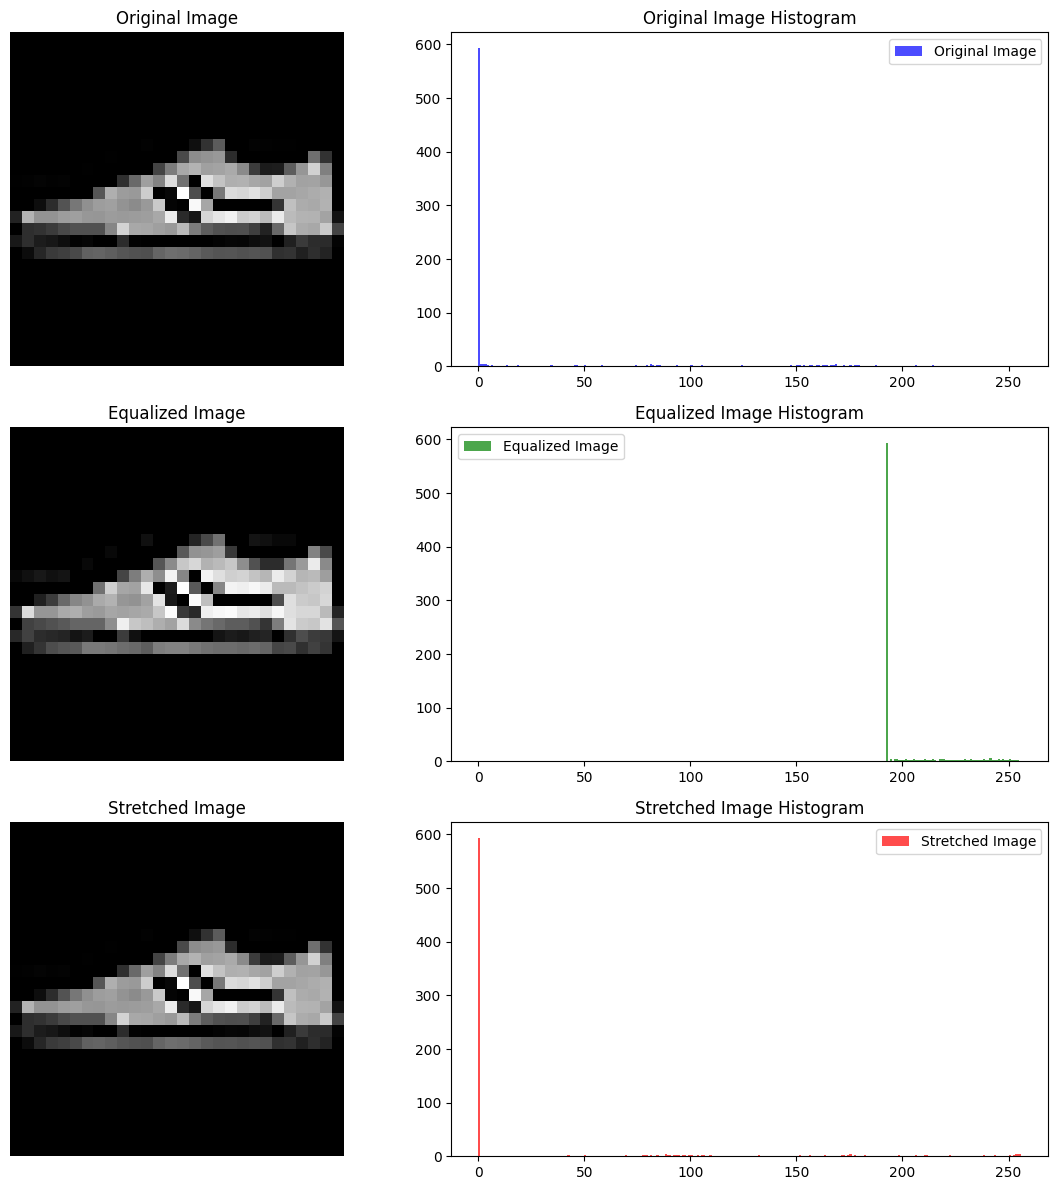

In [ ]:
equalized_image = histogram_equalization(original_image)
stretched_image = apply_histogram_stretching(original_image)
plot_images_and_histograms(original_image, equalized_image, stretched_image)

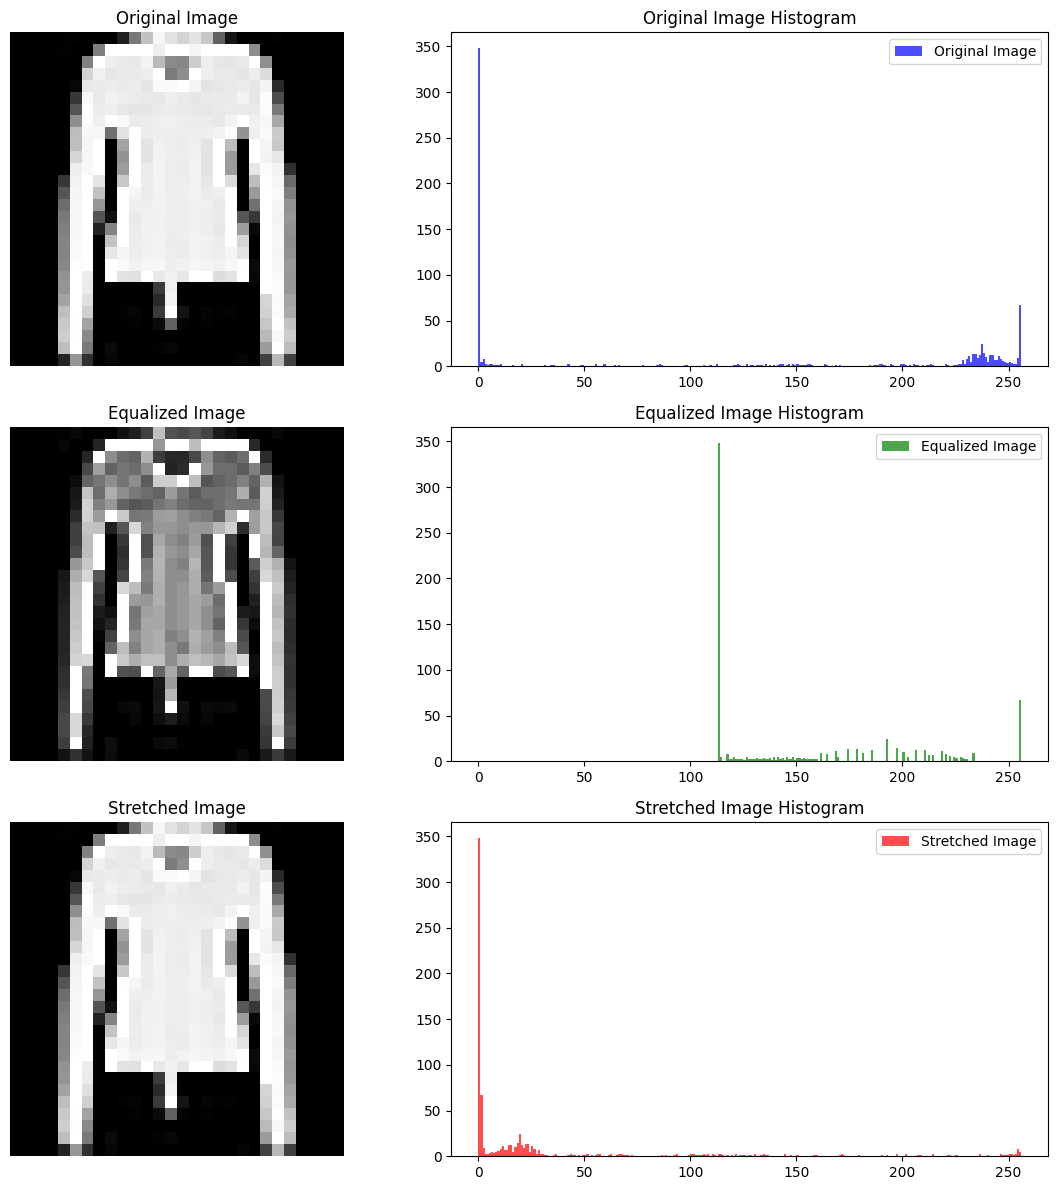

In [ ]:
original_image2 = load_random_image() / 255.0
equalized_image2 = histogram_equalization(original_image2)
stretched_image2 = apply_histogram_stretching(original_image2)
plot_images_and_histograms(original_image2, equalized_image2, stretched_image2)

In [ ]:
def load_image_from_drive(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return image / 255.0
file_path =  '/content/drive/MyDrive/Colab Notebooks/IPCV/4.jpg'
image2 = load_image_from_drive(file_path)
file_path3 =  '/content/drive/MyDrive/Colab Notebooks/IPCV/2.jpg'
image3 = load_image_from_drive(file_path3)

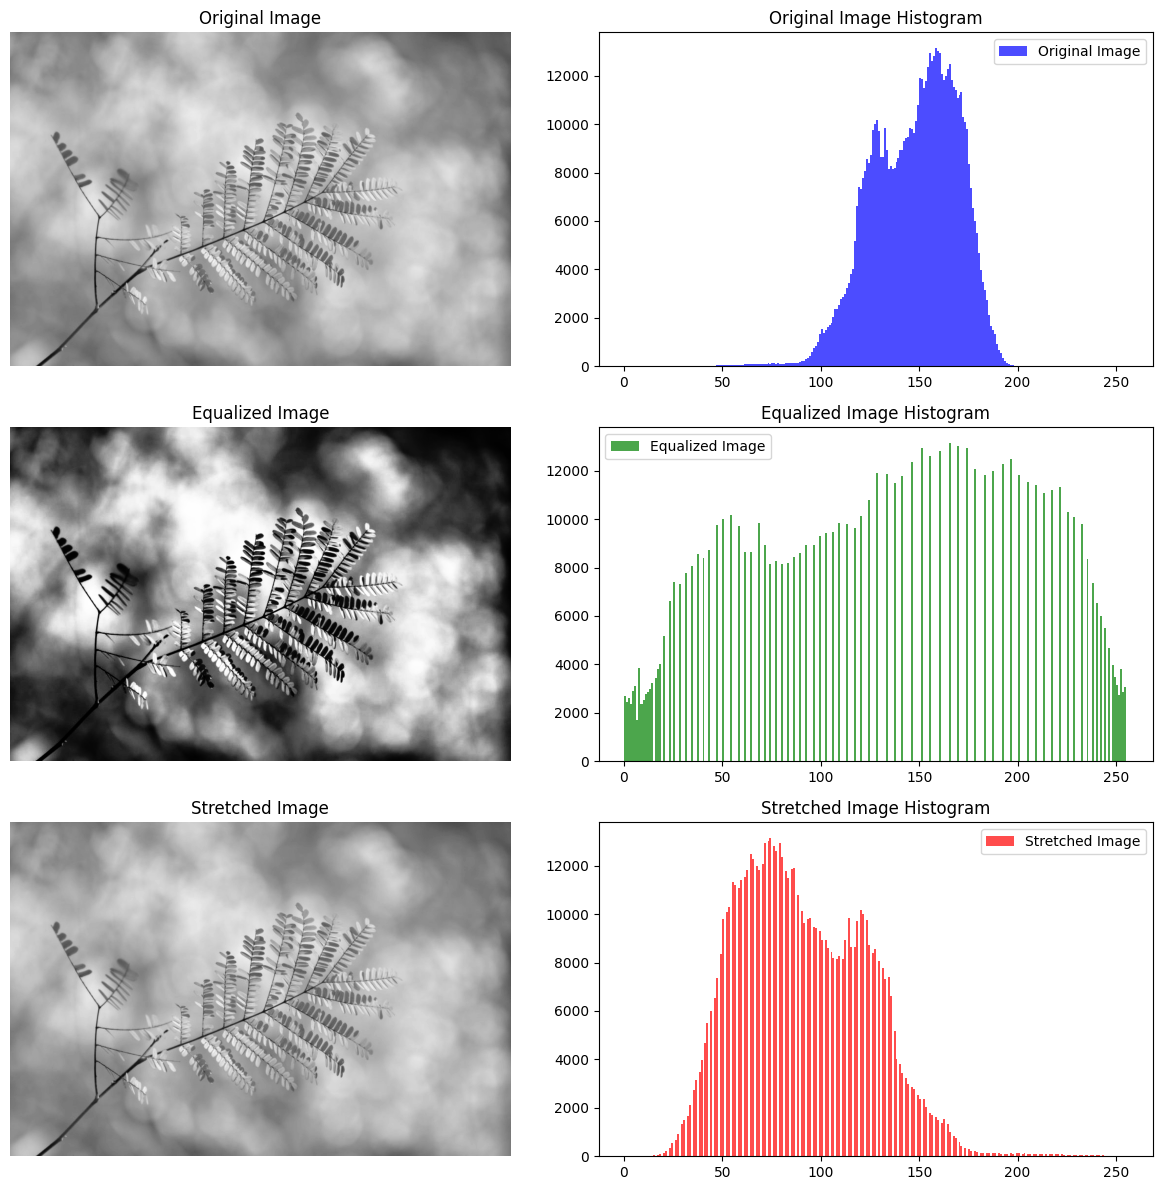

In [ ]:
equalized_image2 = histogram_equalization(image2)
stretched_image2 = apply_histogram_stretching(image2)

plot_images_and_histograms(image2, equalized_image2, stretched_image2)

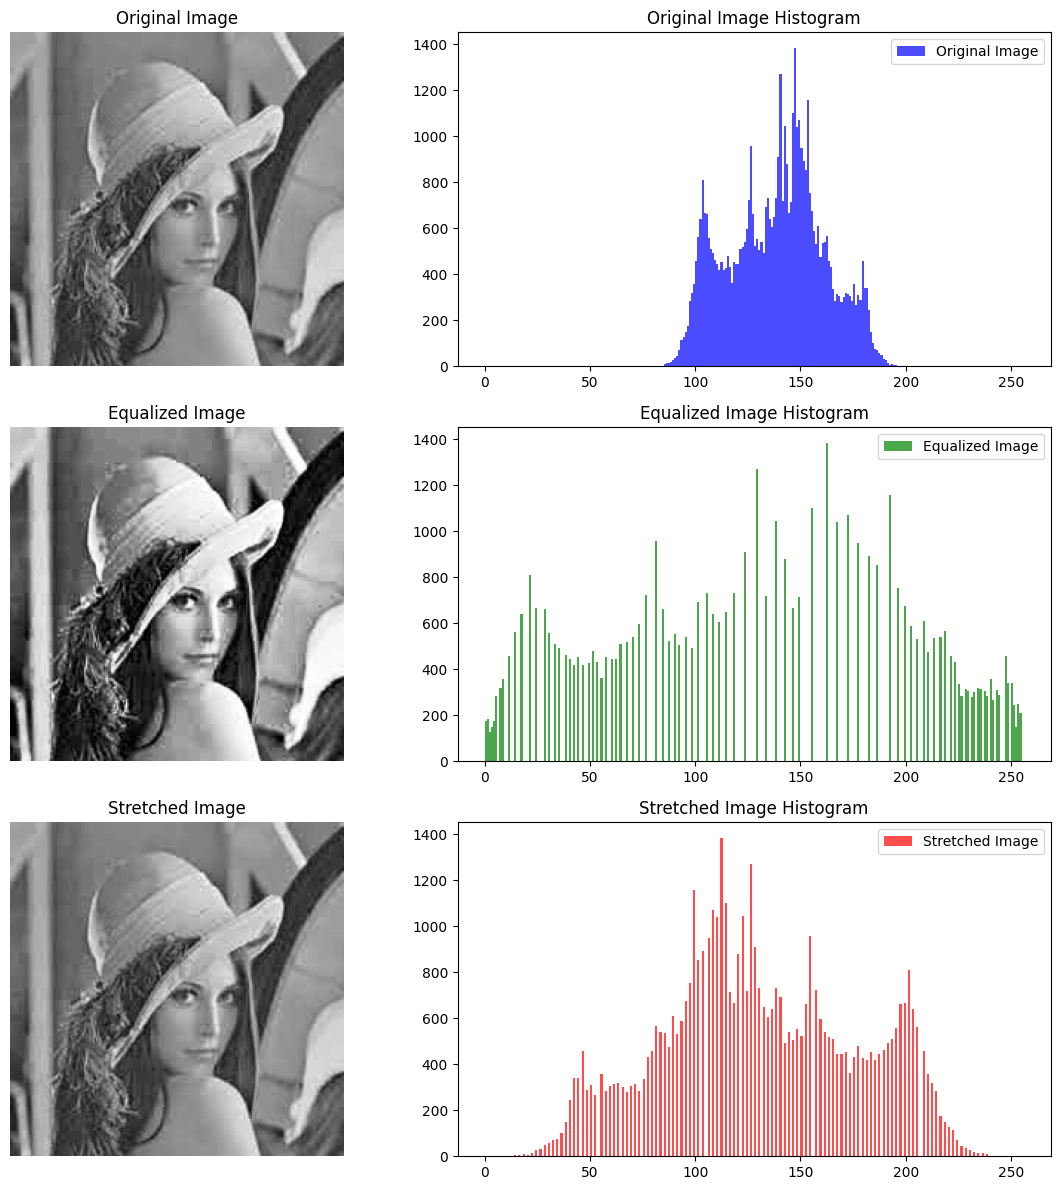

In [ ]:
equalized_image3 = histogram_equalization(image3)
stretched_image3 = apply_histogram_stretching(image3)

plot_images_and_histograms(image3, equalized_image3, stretched_image3)

### Observations:

1. **Histogram Equalization:**
   - This technique enhances the contrast of an image by redistributing pixel intensities to be more evenly spread out.
   - The histogram becomes more uniform, with pixel values spread across the entire range.
   - It is particularly useful for improving the visibility of details in images with a limited range of pixel intensities.

2. **Histogram Stretching:**
   - This method expands the range of pixel intensities to cover the full intensity spectrum from 0 to 255.
   - It stretches the histogram, potentially enhancing contrast but may also introduce noise if the image’s original intensity range is narrow.

3. **Comparison:**
   - Histogram equalization is usually better for improving overall contrast and visibility.
   - Histogram stretching is beneficial when you need to fully utilize the image's dynamic range.

4. **Impact of Image Content:**
   - The effectiveness of these techniques depends on the distribution of pixel intensities in the original image.
   - Images with low contrast gain more from equalization.
   - Images with a limited intensity range benefit from stretching.

5. **Constants and Methods:**
   - `get_pixel_frequency`: Computes how often each pixel intensity value appears in the image.
   - `histogram_equalization`: Applies equalization by using the cumulative distribution function to adjust pixel values.
   - `apply_histogram_stretching`: Stretches the histogram by mapping the intensity values to a new, broader range.
   - `plot_images_and_histograms`: Displays the original, equalized, and stretched images along with their histograms for comparison.

### Applications:

1. **Histogram Equalization:**
   - **Medical Imaging:** Enhances visibility of anatomical details in X-rays and MRIs for better diagnosis.
   - **Astronomy:** Improves contrast in images of celestial objects captured by telescopes to reveal more details.

2. **Histogram Stretching:**
   - **Photography:** Enhances image quality and contrast in photos with limited dynamic range.
   - **Surveillance:** Improves clarity of footage in security cameras by stretching the intensity range.

### Conclusion:

Histogram equalization and stretching are powerful techniques for enhancing image contrast, each suited to different needs. Equalization is ideal for images with low contrast, improving detail visibility, while stretching is useful for maximizing the dynamic range of images with narrow intensity levels. Choosing between them depends on the specific characteristics and requirements of the image in question.